In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [2]:
%matplotlib inline

In [3]:
train_ds_raw = pd.read_csv('dataset/fordTrain.csv')

In [11]:
pd.options.display.max_columns = None

In [46]:
train_ds_raw.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,0.0,10.512332,102.790045,0.290565,-4.230136,0.016262,358.674738,1.757296,1.383058,0.876787,63.311256,1.315265,76.965412,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,0.0,14.049071,127.258629,1.006162,35.508596,0.002304,27.399973,2.854852,1.608807,0.328681,18.891029,5.247204,44.387031,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,0.0,0.000000,0.000000,0.000000,-250.000000,0.008000,260.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,0.0,0.000000,0.000000,0.000000,-8.000000,0.015686,348.000000,0.000000,0.000000,1.000000,52.000000,0.000000,41.930000,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.016001,365.000000,1.000000,1.000000,1.000000,67.000000,0.000000,100.400000,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,0.0,28.240000,211.584000,0.000000,6.000000,0.016694,367.000000,2.000000,2.000000,1.000000,73.000000,0.000000,108.500000,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,0.0,243.991000,359.995000,4.000000,260.000000,0.023939,513.000000,25.000000,9.000000,1.000000,127.000000,52.400000,129.700000,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


In [47]:
correlation_matrix_raw = train_ds_raw.corr()

In [48]:
sns.mpl.rc('figure', figsize=(10,10))

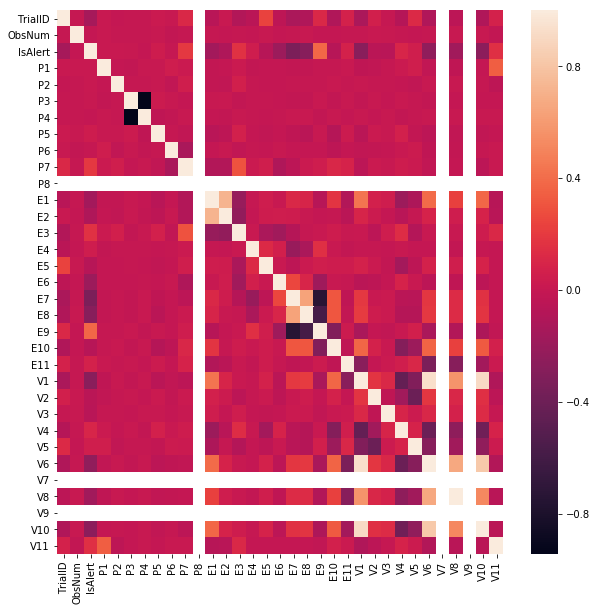

In [49]:
sns.heatmap(correlation_matrix_raw)

In [50]:
train_ds = train_ds_raw.drop(['P8', 'V7', 'V9', 'TrialID'], axis=1)

In [52]:
correlation_matrix = train_ds.corr()

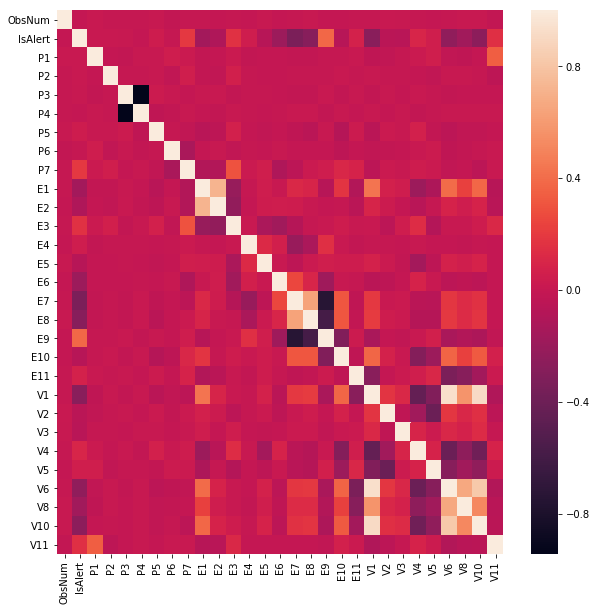

In [53]:
sns.heatmap(correlation_matrix)

In [54]:
correlation_matrix

,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11
ObsNum,1.000000,-0.005143,0.018324,-0.001764,0.002199,-0.001191,0.005568,-0.015791,0.003498,-0.000122,-0.003558,0.002931,-0.004580,0.010314,-0.003838,0.002005,0.009400,-0.002779,-0.008684,0.004978,0.004242,0.019009,0.007753,-0.000480,-0.006284,0.003935,0.008191,0.005145,-0.011465
IsAlert,-0.005143,1.000000,0.018361,0.014383,0.005168,-0.008177,0.038160,-0.000400,0.189796,-0.160830,-0.105495,0.157973,0.047992,-0.067453,-0.189198,-0.329722,-0.283440,0.380353,-0.067051,0.079002,-0.269967,-0.050740,-0.062000,0.097022,0.055429,-0.244150,-0.165550,-0.259607,0.155722
P1,0.018324,0.018361,1.000000,-0.006674,-0.010317,0.011704,0.010911,0.045429,0.027461,-0.015436,-0.009356,0.024131,-0.010574,-0.006564,-0.004635,-0.013194,-0.010918,0.004688,0.004549,0.015882,-0.025763,-0.021118,0.002551,0.021404,0.051348,-0.019792,-0.029747,-0.004563,0.344636
P2,-0.001764,0.014383,-0.006674,1.000000,-0.002539,0.002132,0.008390,-0.022003,0.052171,-0.012045,-0.019121,0.062076,0.003529,-0.005140,-0.006843,-0.002058,0.002920,0.002266,0.014589,0.001857,0.011310,0.001779,0.002272,-0.006038,-0.023902,0.010608,0.008257,0.001946,-0.034248
P3,0.002199,0.005168,-0.010317,-0.002539,1.000000,-0.944435,0.035129,0.012444,-0.006097,0.005795,0.013007,-0.016437,0.000515,0.004496,-0.004508,-0.014086,-0.014135,0.018113,-0.013289,0.007423,-0.011347,0.008651,-0.006380,0.013045,0.001312,-0.010245,-0.007963,-0.009630,-0.009808
P4,-0.001191,-0.008177,0.011704,0.002132,-0.944435,1.000000,-0.032897,-0.010627,0.007323,-0.004870,-0.010749,0.010696,0.001580,-0.003086,0.004230,0.013755,0.012959,-0.016615,0.010501,-0.005681,0.010061,-0.006926,0.008049,-0.010905,0.001705,0.008348,0.005379,0.008906,0.009841
P5,0.005568,0.038160,0.010911,0.008390,0.035129,-0.032897,1.000000,0.002314,-0.023628,-0.062955,-0.033420,0.069444,-0.002757,-0.020218,-0.006387,-0.032576,-0.048551,0.005177,-0.074753,0.028216,-0.054428,0.026232,0.005371,0.070290,-0.016671,-0.046353,-0.023359,-0.022193,-0.004897
P6,-0.015791,-0.000400,0.045429,-0.022003,0.012444,-0.010627,0.002314,1.000000,-0.125580,-0.006273,0.006025,-0.025157,-0.001288,-0.007514,0.011529,-0.006923,-0.008941,-0.005549,-0.034470,-0.008939,-0.024449,-0.010418,-0.004996,0.019121,0.029222,-0.025728,-0.016850,-0.002163,0.012783
P7,0.003498,0.189796,0.027461,0.052171,-0.006097,0.007323,-0.023628,-0.125580,1.000000,-0.087373,-0.091327,0.294528,0.026627,0.051338,-0.105148,-0.042634,0.022973,0.045725,0.109924,0.084846,-0.043512,0.025850,0.007986,0.037711,0.024499,-0.020696,-0.008450,-0.041814,0.019360
E1,-0.000122,-0.160830,-0.015436,-0.012045,0.005795,-0.004870,-0.062955,-0.006273,-0.087373,1.000000,0.725684,-0.210994,-0.001312,0.046620,0.011380,0.114083,0.092611,-0.066801,0.176868,-0.088023,0.430603,0.068999,0.045605,-0.185484,-0.114477,0.399214,0.227876,0.382013,-0.070397


---
# Naive

In [223]:
train_ds = train_ds_raw.copy()

In [227]:
train, test = train_test_split(train_ds, test_size=0.2, random_state=5041501)

In [228]:
train_x = train.drop('IsAlert', axis=1)
train_y = train.IsAlert
test_x = test.drop('IsAlert', axis=1)
test_y = test.IsAlert

In [229]:
gnb = GaussianNB()
pred_y = gnb.fit(train_x, train_y).predict(test_x)

In [230]:
print(classification_report(test_y, pred_y))

             precision    recall  f1-score   support

          0       0.55      0.87      0.67     50598
          1       0.84      0.48      0.61     70268

avg / total       0.72      0.65      0.64    120866



In [231]:
lrc = LogisticRegression()
pred_y = lrc.fit(train_x, train_y).predict(test_x)

In [232]:
print(classification_report(test_y, pred_y))

             precision    recall  f1-score   support

          0       0.82      0.73      0.77     50598
          1       0.82      0.88      0.85     70268

avg / total       0.82      0.82      0.82    120866



---
# w/o invariant features

In [233]:
train_ds = train_ds_raw.drop(['P8', 'V7', 'V9', 'TrialID'], axis=1)

In [240]:
train, test = train_test_split(train_ds, test_size=0.2, random_state=5041501)

In [235]:
train_x = train.drop('IsAlert', axis=1)
train_y = train.IsAlert
test_x = test.drop('IsAlert', axis=1)
test_y = test.IsAlert

In [236]:
gnb = GaussianNB()
pred_y = gnb.fit(train_x, train_y).predict(test_x)

In [237]:
print(classification_report(test_y, pred_y))

             precision    recall  f1-score   support

          0       0.55      0.87      0.67     50598
          1       0.84      0.48      0.61     70268

avg / total       0.72      0.64      0.64    120866



In [238]:
lrc = LogisticRegression()
pred_y = lrc.fit(train_x, train_y).predict(test_x)

In [239]:
print(classification_report(test_y, pred_y))

             precision    recall  f1-score   support

          0       0.76      0.71      0.74     50598
          1       0.80      0.84      0.82     70268

avg / total       0.79      0.79      0.79    120866



---
# w/o invariant features & `ObsNum`

In [242]:
train_ds = train_ds_raw.drop(['P8', 'V7', 'V9', 'TrialID', 'ObsNum'], axis=1)

In [243]:
train, test = train_test_split(train_ds, test_size=0.2, random_state=5041501)

In [244]:
train_x = train.drop('IsAlert', axis=1)
train_y = train.IsAlert
test_x = test.drop('IsAlert', axis=1)
test_y = test.IsAlert

In [245]:
gnb = GaussianNB()
pred_y = gnb.fit(train_x, train_y).predict(test_x)

In [246]:
print(classification_report(test_y, pred_y))

             precision    recall  f1-score   support

          0       0.55      0.87      0.67     50598
          1       0.84      0.48      0.61     70268

avg / total       0.72      0.65      0.64    120866



In [247]:
lrc = LogisticRegression()
pred_y = lrc.fit(train_x, train_y).predict(test_x)

In [248]:
print(classification_report(test_y, pred_y))

             precision    recall  f1-score   support

          0       0.76      0.71      0.74     50598
          1       0.80      0.84      0.82     70268

avg / total       0.79      0.79      0.79    120866



---
# w/o physical & invariant features

In [214]:
train_ds = train_ds_raw.drop(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'V7', 'V9', 'TrialID'], axis=1)

In [215]:
train, test = train_test_split(train_ds, test_size=0.2)

In [216]:
train_x = train.drop('IsAlert', axis=1)
train_y = train.IsAlert
test_x = test.drop('IsAlert', axis=1)
test_y = test.IsAlert

In [219]:
gnb = GaussianNB()
pred_y = gnb.fit(train_x, train_y).predict(test_x)

In [220]:
print(classification_report(test_y, pred_y))

             precision    recall  f1-score   support

          0       0.68      0.68      0.68     50716
          1       0.77      0.77      0.77     70150

avg / total       0.73      0.73      0.73    120866



In [221]:
lrc = LogisticRegression()
pred_y = lrc.fit(train_x, train_y).predict(test_x)

In [222]:
print(classification_report(test_y, pred_y))

             precision    recall  f1-score   support

          0       0.76      0.71      0.74     50716
          1       0.80      0.84      0.82     70150

avg / total       0.78      0.79      0.78    120866



---
# Rolling std only

In [324]:
train_ds = train_ds_raw.drop(
    ['ObsNum', 'P8', 'V7', 'V9', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7'],
    axis=1
)

In [326]:
std_only_ds = train_ds.groupby('TrialID').rolling(window=10, min_periods=1).std()
std_only_ds.reset_index(0, drop=True, inplace=True)
std_only_ds.IsAlert = train_ds_raw.IsAlert

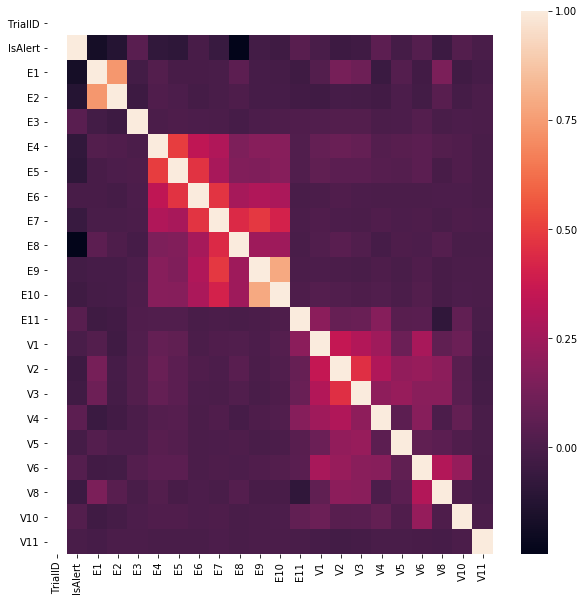

In [328]:
sns.heatmap(std_only_ds.corr())

In [329]:
train, test = train_test_split(std_only_ds, test_size=0.2, random_state=5041501)
train = train.dropna()
test = test.dropna()

In [330]:
train_x = train.drop('IsAlert', axis=1)
train_y = train.IsAlert
test_x = test.drop('IsAlert', axis=1)
test_y = test.IsAlert

In [331]:
gnb = GaussianNB()
pred_y = gnb.fit(train_x, train_y).predict(test_x)

In [332]:
print(classification_report(test_y, pred_y))

             precision    recall  f1-score   support

          0       0.56      0.63      0.59     50550
          1       0.71      0.64      0.67     70212

avg / total       0.64      0.64      0.64    120762



In [333]:
lrc = LogisticRegression()
pred_y = lrc.fit(train_x, train_y).predict(test_x)

In [334]:
print(classification_report(test_y, pred_y))

             precision    recall  f1-score   support

          0       0.62      0.37      0.47     50550
          1       0.65      0.83      0.73     70212

avg / total       0.64      0.64      0.62    120762



---

# Original with rolling std

In [274]:
train_ds = train_ds_raw.drop(
    ['ObsNum', 'P8', 'V7', 'V9', 'TrialID', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7'],
    axis=1
)

In [275]:
std = train_ds.rolling(window=10, min_periods=1).std().drop('IsAlert', axis=1)
original_with_std = pd.merge(train_ds, std, left_index=True, right_index=True, suffixes=['_original', '_std'])
original_with_std.drop(0, inplace=True)

In [276]:
train, test = train_test_split(original_with_std, test_size=0.2, random_state=5041501)
train = train.dropna()
test = test.dropna()

In [277]:
train_x = train.drop('IsAlert', axis=1)
train_y = train.IsAlert
test_x = test.drop('IsAlert', axis=1)
test_y = test.IsAlert

In [278]:
gnb = GaussianNB()
pred_y = gnb.fit(train_x, train_y).predict(test_x)

In [279]:
print(classification_report(test_y, pred_y))

             precision    recall  f1-score   support

          0       0.61      0.81      0.70     50550
          1       0.82      0.62      0.71     70316

avg / total       0.73      0.70      0.70    120866



In [280]:
lrc = LogisticRegression()
pred_y = lrc.fit(train_x, train_y).predict(test_x)

In [281]:
print(classification_report(test_y, pred_y))

             precision    recall  f1-score   support

          0       0.77      0.71      0.74     50550
          1       0.80      0.85      0.83     70316

avg / total       0.79      0.79      0.79    120866



# Different windows

Random moving windows with different width and aggregator function.

⚠️this will train ***a lot*** of models and will take a lot of time. Feel free to tune aggregating functions, window sizes and controlling whether you want to merge aggregated features with original data.

In [4]:
train_ds = train_ds_raw.drop(
    ['ObsNum', 'P8', 'V7', 'V9', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7'],
    axis=1
)

In [7]:
for func in 'sum', 'mean', 'median', 'var', 'std', 'min', 'max':
    for merge in True, False, True:
        for w in 20, 50, 200:
            display(Markdown(f'## {func} aggregator with {w}-width; {"with" if merge else "w/o"} original'))
            ds = getattr(train_ds.groupby('TrialID').rolling(window=w, min_periods=1), func)()
            ds.reset_index(0, drop=True, inplace=True)
            if merge:
                ds.drop('IsAlert', inplace=True, axis=1)
                ds = pd.merge(train_ds, ds, left_index=True, right_index=True, suffixes=['', f'_{func}'])
            else:
                ds.IsAlert = train_ds_raw.IsAlert
            train, test = train_test_split(ds, test_size=0.2, random_state=5041501)
            train = train.dropna()
            test = test.dropna()
            train_x = train.drop('IsAlert', axis=1)
            train_y = train.IsAlert
            test_x = test.drop('IsAlert', axis=1)
            test_y = test.IsAlert
            display(Markdown('### Naive Bayes:'))
            gnb = GaussianNB()
            pred_y = gnb.fit(train_x, train_y).predict(test_x)
            print(classification_report(test_y, pred_y))
            display(Markdown('### Logistic regression:'))
            lrc = LogisticRegression()
            pred_y = lrc.fit(train_x, train_y).predict(test_x)
            print(classification_report(test_y, pred_y))
            display(Markdown('---'))

## sum aggregator with 20-width; with original

### Naive Bayes:

             precision    recall  f1-score   support

          0       0.63      0.81      0.71     50598
          1       0.83      0.66      0.74     70268

avg / total       0.75      0.72      0.72    120866



### Logistic regression:

             precision    recall  f1-score   support

          0       0.81      0.72      0.76     50598
          1       0.81      0.88      0.84     70268

avg / total       0.81      0.81      0.81    120866



---

## sum aggregator with 50-width; with original

### Naive Bayes:

             precision    recall  f1-score   support

          0       0.61      0.83      0.70     50598
          1       0.83      0.62      0.71     70268

avg / total       0.74      0.70      0.71    120866



### Logistic regression:

             precision    recall  f1-score   support

          0       0.81      0.71      0.76     50598
          1       0.81      0.88      0.84     70268

avg / total       0.81      0.81      0.81    120866



---

## sum aggregator with 200-width; with original

### Naive Bayes:

             precision    recall  f1-score   support

          0       0.58      0.80      0.68     50598
          1       0.81      0.59      0.68     70268

avg / total       0.71      0.68      0.68    120866



### Logistic regression:

             precision    recall  f1-score   support

          0       0.81      0.72      0.76     50598
          1       0.81      0.88      0.84     70268

avg / total       0.81      0.81      0.81    120866



---

## mean aggregator with 20-width; with original

### Naive Bayes:

             precision    recall  f1-score   support

          0       0.68      0.75      0.72     50598
          1       0.81      0.75      0.78     70268

avg / total       0.76      0.75      0.75    120866



### Logistic regression:

             precision    recall  f1-score   support

          0       0.82      0.73      0.77     50598
          1       0.82      0.88      0.85     70268

avg / total       0.82      0.82      0.82    120866



---

## mean aggregator with 50-width; with original

### Naive Bayes:

             precision    recall  f1-score   support

          0       0.68      0.77      0.72     50598
          1       0.82      0.74      0.78     70268

avg / total       0.76      0.75      0.75    120866



### Logistic regression:

             precision    recall  f1-score   support

          0       0.82      0.73      0.77     50598
          1       0.82      0.88      0.85     70268

avg / total       0.82      0.82      0.82    120866



---

## mean aggregator with 200-width; with original

### Naive Bayes:

             precision    recall  f1-score   support

          0       0.69      0.77      0.73     50598
          1       0.82      0.75      0.78     70268

avg / total       0.76      0.76      0.76    120866



### Logistic regression:

             precision    recall  f1-score   support

          0       0.82      0.74      0.78     50598
          1       0.83      0.88      0.85     70268

avg / total       0.82      0.83      0.82    120866



---

## median aggregator with 20-width; with original

### Naive Bayes:

             precision    recall  f1-score   support

          0       0.69      0.74      0.72     50598
          1       0.80      0.76      0.78     70268

avg / total       0.76      0.75      0.75    120866



### Logistic regression:

             precision    recall  f1-score   support

          0       0.81      0.73      0.77     50598
          1       0.82      0.88      0.85     70268

avg / total       0.82      0.82      0.81    120866



---

## median aggregator with 50-width; with original

### Naive Bayes:

             precision    recall  f1-score   support

          0       0.69      0.75      0.72     50598
          1       0.81      0.76      0.78     70268

avg / total       0.76      0.76      0.76    120866



### Logistic regression:

             precision    recall  f1-score   support

          0       0.82      0.73      0.77     50598
          1       0.82      0.88      0.85     70268

avg / total       0.82      0.82      0.81    120866



---

## median aggregator with 200-width; with original

### Naive Bayes:

             precision    recall  f1-score   support

          0       0.71      0.73      0.72     50598
          1       0.80      0.79      0.79     70268

avg / total       0.76      0.76      0.76    120866



### Logistic regression:

             precision    recall  f1-score   support

          0       0.81      0.73      0.77     50598
          1       0.82      0.88      0.85     70268

avg / total       0.82      0.82      0.81    120866



---

## var aggregator with 20-width; with original

### Naive Bayes:

             precision    recall  f1-score   support

          0       0.56      0.85      0.68     50550
          1       0.83      0.52      0.64     70212

avg / total       0.72      0.66      0.65    120762



### Logistic regression:

             precision    recall  f1-score   support

          0       0.78      0.70      0.73     50550
          1       0.80      0.86      0.83     70212

avg / total       0.79      0.79      0.79    120762



---

## var aggregator with 50-width; with original

### Naive Bayes:

             precision    recall  f1-score   support

          0       0.55      0.85      0.67     50550
          1       0.82      0.51      0.63     70212

avg / total       0.71      0.65      0.65    120762



### Logistic regression:

             precision    recall  f1-score   support

          0       0.77      0.70      0.74     50550
          1       0.80      0.85      0.82     70212

avg / total       0.79      0.79      0.79    120762



---

## var aggregator with 200-width; with original

### Naive Bayes:

             precision    recall  f1-score   support

          0       0.54      0.85      0.66     50550
          1       0.82      0.48      0.61     70212

avg / total       0.71      0.64      0.63    120762



### Logistic regression:

             precision    recall  f1-score   support

          0       0.80      0.70      0.75     50550
          1       0.80      0.88      0.84     70212

avg / total       0.80      0.80      0.80    120762



---

## std aggregator with 20-width; with original

### Naive Bayes:

             precision    recall  f1-score   support

          0       0.61      0.83      0.70     50550
          1       0.83      0.61      0.71     70212

avg / total       0.74      0.70      0.70    120762



### Logistic regression:

             precision    recall  f1-score   support

          0       0.82      0.73      0.77     50550
          1       0.82      0.88      0.85     70212

avg / total       0.82      0.82      0.82    120762



---

## std aggregator with 50-width; with original

### Naive Bayes:

             precision    recall  f1-score   support

          0       0.58      0.84      0.69     50550
          1       0.84      0.57      0.68     70212

avg / total       0.73      0.68      0.68    120762



### Logistic regression:

             precision    recall  f1-score   support

          0       0.82      0.73      0.78     50550
          1       0.82      0.89      0.85     70212

avg / total       0.82      0.82      0.82    120762



---

## std aggregator with 200-width; with original

### Naive Bayes:

             precision    recall  f1-score   support

          0       0.57      0.85      0.68     50550
          1       0.84      0.54      0.66     70212

avg / total       0.72      0.67      0.67    120762



### Logistic regression:

             precision    recall  f1-score   support

          0       0.83      0.73      0.78     50550
          1       0.82      0.90      0.86     70212

avg / total       0.83      0.82      0.82    120762



---

## min aggregator with 20-width; with original

### Naive Bayes:

             precision    recall  f1-score   support

          0       0.63      0.81      0.71     50598
          1       0.83      0.65      0.73     70268

avg / total       0.75      0.72      0.72    120866



### Logistic regression:

             precision    recall  f1-score   support

          0       0.81      0.74      0.77     50598
          1       0.82      0.88      0.85     70268

avg / total       0.82      0.82      0.82    120866



---

## min aggregator with 50-width; with original

### Naive Bayes:

             precision    recall  f1-score   support

          0       0.59      0.84      0.70     50598
          1       0.84      0.58      0.69     70268

avg / total       0.74      0.69      0.69    120866



### Logistic regression:

             precision    recall  f1-score   support

          0       0.82      0.73      0.77     50598
          1       0.82      0.88      0.85     70268

avg / total       0.82      0.82      0.82    120866



---

## min aggregator with 200-width; with original

### Naive Bayes:

             precision    recall  f1-score   support

          0       0.58      0.84      0.69     50598
          1       0.83      0.57      0.67     70268

avg / total       0.73      0.68      0.68    120866



### Logistic regression:

             precision    recall  f1-score   support

          0       0.83      0.73      0.78     50598
          1       0.82      0.89      0.85     70268

avg / total       0.82      0.82      0.82    120866



---

## max aggregator with 20-width; with original

### Naive Bayes:

             precision    recall  f1-score   support

          0       0.69      0.74      0.71     50598
          1       0.80      0.76      0.78     70268

avg / total       0.75      0.75      0.75    120866



### Logistic regression:

             precision    recall  f1-score   support

          0       0.82      0.72      0.77     50598
          1       0.82      0.89      0.85     70268

avg / total       0.82      0.82      0.82    120866



---

## max aggregator with 50-width; with original

### Naive Bayes:

             precision    recall  f1-score   support

          0       0.66      0.79      0.72     50598
          1       0.82      0.71      0.76     70268

avg / total       0.75      0.74      0.74    120866



### Logistic regression:

             precision    recall  f1-score   support

          0       0.83      0.73      0.77     50598
          1       0.82      0.89      0.85     70268

avg / total       0.82      0.82      0.82    120866



---

## max aggregator with 200-width; with original

### Naive Bayes:

             precision    recall  f1-score   support

          0       0.60      0.84      0.70     50598
          1       0.84      0.60      0.70     70268

avg / total       0.74      0.70      0.70    120866



### Logistic regression:

             precision    recall  f1-score   support

          0       0.84      0.74      0.78     50598
          1       0.82      0.90      0.86     70268

avg / total       0.83      0.83      0.83    120866



---

# Per trial aggreagtions

Naive bruteforce feature creation by aggregating all non-physical metrics by trials

In [23]:
train_ds = train_ds_raw.drop(
    ['ObsNum', 'P8', 'V7', 'V9', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7'],
    axis=1
)

In [29]:
ds = train_ds.copy()
for func in 'max', 'min', 'mean', 'median', 'std':
    aggregated = getattr(train_ds.groupby('TrialID'), func)().drop('IsAlert', axis=1)
    ds = ds.merge(aggregated, left_on='TrialID', right_index=True, suffixes=['', '_' + func])

In [32]:
train, test = train_test_split(ds, test_size=0.2, random_state=5041501)
train = train.dropna()
test = test.dropna()
train_x = train.drop('IsAlert', axis=1)
train_y = train.IsAlert
test_x = test.drop('IsAlert', axis=1)
test_y = test.IsAlert

In [33]:
gnb = GaussianNB()
pred_y = gnb.fit(train_x, train_y).predict(test_x)
print(classification_report(test_y, pred_y))

             precision    recall  f1-score   support

          0       0.60      0.83      0.69     50598
          1       0.83      0.59      0.69     70268

avg / total       0.73      0.69      0.69    120866



In [34]:
lrc = LogisticRegression()
pred_y = lrc.fit(train_x, train_y).predict(test_x)
print(classification_report(test_y, pred_y))

             precision    recall  f1-score   support

          0       0.89      0.82      0.85     50598
          1       0.87      0.93      0.90     70268

avg / total       0.88      0.88      0.88    120866



In [36]:
roc_auc_score(test_y, pred_y)

0.8712628342042886

In [59]:
weights = sorted(zip(train_x.columns ,lrc.coef_[0]), reverse=True, key=lambda x: abs(x[1]))
weights

[('E9', 2.662625372347023),
 ('E9_min', 0.8215635408704546),
 ('V5_min', 0.7803186266471944),
 ('E8_mean', -0.6073702753933001),
 ('V10_median', -0.6072983441352349),
 ('V11_median', 0.5449001578301943),
 ('V11_min', -0.5150889184911813),
 ('E3_mean', -0.49643710875745595),
 ('E8_std', -0.49131294418051863),
 ('V2_mean', 0.4698261850115486),
 ('V2_min', -0.4574824344980008),
 ('V5_mean', 0.4552111896063951),
 ('E3_std', 0.4499451744526564),
 ('E3_median', -0.4263327706251706),
 ('E9_mean', 0.4005244907205298),
 ('V5_max', 0.3964945083185477),
 ('E9_max', 0.3807439545727079),
 ('V10_max', 0.3680098620253643),
 ('E3_min', 0.36359219038396257),
 ('E3_max', 0.3577647033394549),
 ('E8_min', 0.3558585894558248),
 ('V5_median', -0.3545862449674232),
 ('E7_min', 0.3372098002882152),
 ('E1_std', -0.3218746513624453),
 ('V11_std', -0.3175314331211265),
 ('V5', 0.2795728436107666),
 ('V2_median', 0.2749239965772178),
 ('V11_mean', 0.2394341312804933),
 ('E9_median', 0.22933283394581158),
 ('E8', 

In [77]:
sorted(ds.corr().IsAlert.items(), reverse=True, key=lambda x: abs(x[1]))

[('IsAlert', 1.0),
 ('E9', 0.38035253000113456),
 ('E7', -0.3297216784513879),
 ('E8', -0.2834396158996142),
 ('E9_max', 0.2740730758208812),
 ('V1_max', -0.27042197633743337),
 ('V1', -0.269966521893559),
 ('V10', -0.25960724337549596),
 ('E4_max', -0.2546233286441935),
 ('V3_max', -0.24179512058010083),
 ('E1_min', nan),
 ('E2_min', nan),
 ('E11_min', nan),
 ('E8_std', -0.37633670691601356),
 ('V11_median', 0.3550413959109491),
 ('V11_min', 0.338252221647768),
 ('E1_std', -0.33623829807897465),
 ('E7_mean', -0.3216565276455545),
 ('E8_mean', -0.31951944782990216),
 ('E9_mean', 0.31819910487140113),
 ('E7_median', -0.3113976951553943),
 ('E9_median', 0.3072518876144614),
 ('E1_mean', -0.2873823074099205),
 ('V10_mean', -0.2789272995363445),
 ('V10_median', -0.27578286802696206),
 ('V10_min', -0.2748838132281991),
 ('V1_mean', -0.2736681345464895),
 ('V1_median', -0.27183711598762234),
 ('V6_mean', -0.2617946679518297),
 ('V8_mean', -0.261540809585448),
 ('E2_std', -0.25917188189238355